# Understanding Descriptive Statistics

Import the necessary libraries here:

In [22]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pprint as pprint
import pandas as pd
import seaborn as sns
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [38]:
# your code here
def dice_roll(times):
    dice_df = pd.DataFrame(random.choices(range(1,7),k=times),columns=['Rolled No'])
    return dice_df

dice = dice_roll(10)
dice

,Rolled No
0,4
1,1
2,5
3,1
4,1
5,1
6,4
7,4
8,6
9,3


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

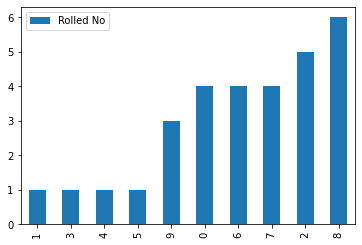

In [43]:
# your code here
dice.sort_values(by='Rolled No').plot(kind='bar')

#plot like line plot makes no sense here - plotted a bar chart instead

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:ylabel='Frequency'>

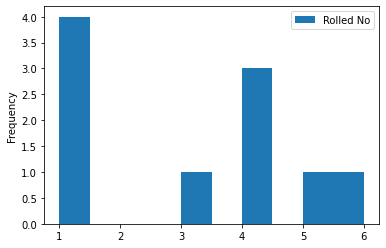

In [44]:
# your code here
dice.sort_values(by='Rolled No').plot(kind='hist')

In [ ]:
"""
The number of occurrences of each number in the first plot is coded in the x-axis,
while on the histogram the number of times a number results on the die is on the Y.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [50]:
# your code here
def mean_calc(df_c):
    return (sum(df_c) / len(df_c))

mean_calc(dice['Rolled No'])

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [96]:
# your code here
def freq_calc(df_c):
    dic = {}
    for n in df_c:
        if n not in dic:
            dic[n] = 1
        else:
            dic[n] += 1
    return dic

freq_dict = freq_calc(dice['Rolled No'])
display(freq_dict)

manual_mean= sum(k*v for k,v in freq_dict.items())/sum([v for k, v in freq_dict.items()])
manual_mean

{4: 3, 1: 4, 5: 1, 6: 1, 3: 1}

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [98]:
# your code here
def median_calc(df_c):
    df_c.sort_values()
    if len(df_c) % 2 != 0:
        return df_c[len(df_c) / 2]
    else:
        return (df_c[len(df_c) / 2 - 1] + df_c[len(df_c) / 2]) / 2.0

median_calc(dice['Rolled No'])

1.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [104]:
# your code here

## No ideia :(

dice.describe()

,Rolled No
count,10.000000
mean,3.000000
std,1.885618
min,1.000000
25%,1.000000
50%,3.500000
75%,4.000000
max,6.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


<BarContainer object of 100 artists>

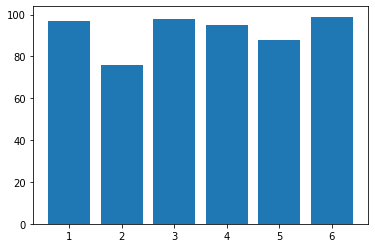

In [126]:
# your code here

dices= pd.read_csv('/Users/AnaPSilva/Documents/Ana/Ironhack/Bootcamp/Week4/Labs/Descriptive-Stats/data/roll_the_dice_hundred.csv')
display(dices.head())

plt.bar(dices['value'],dices['roll'])

In [ ]:
"""
I see a bar plot...? ahah
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [122]:
# your code here
dices.describe()


,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


#### 3.- Now, calculate the frequency distribution.


In [129]:
# your code here
freq_calc(dices['value'])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

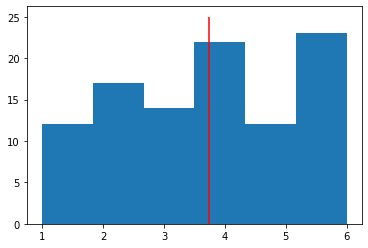

In [135]:
# your code here
plt.hist(dices['value'], bins=6)
plt.vlines(dices['value'].mean(), ymin=0, ymax=25,colors='red')


In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

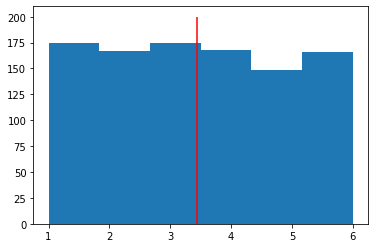

In [138]:
# your code here
dices2= pd.read_csv('/Users/AnaPSilva/Documents/Ana/Ironhack/Bootcamp/Week4/Labs/Descriptive-Stats/data/roll_the_dice_thousand.csv')
dices2.head()

plt.hist(dices2['value'], bins=6)
plt.vlines(dices2['value'].mean(), ymin=0, ymax=200,colors='red')

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

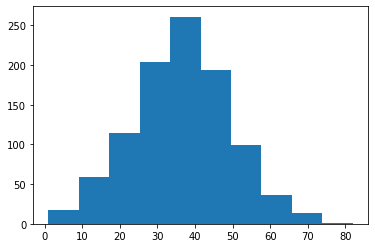

In [107]:
# your code here
data1= pd.read_csv('/Users/AnaPSilva/Documents/Ana/Ironhack/Bootcamp/Week4/Labs/Descriptive-Stats/data/ages_population.csv')
data1.head()

plt.hist(data1)

#The mean will be around 30-45 y.o.
## The std should be around 10 to 20 years


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [111]:
# your code here
print(f'The mean age is {data1.mean()}')
print(f'The St. deviation is {data1.std()}')

The mean age is observation    36.56
dtype: float64
The St. deviation is observation    12.8165
dtype: float64


In [ ]:
"""
Yes
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

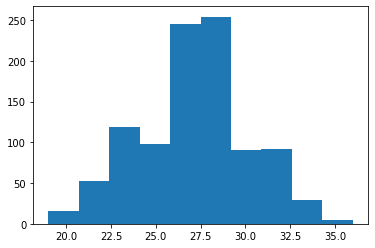

In [112]:
# your code here
data2= pd.read_csv('/Users/AnaPSilva/Documents/Ana/Ironhack/Bootcamp/Week4/Labs/Descriptive-Stats/data/ages_population2.csv')
data2.head()

plt.hist(data2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, the ages are not as spread out and the mean age will be lower"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [113]:
# your code here
print(f'The mean age is {data2.mean()}')
print(f'The St. deviation is {data2.std()}')

The mean age is observation    27.155
dtype: float64
The St. deviation is observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

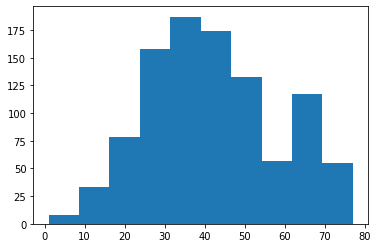

In [114]:
# your code here

data3= pd.read_csv('/Users/AnaPSilva/Documents/Ana/Ironhack/Bootcamp/Week4/Labs/Descriptive-Stats/data/ages_population3.csv')
data3.head()

plt.hist(data3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [115]:
# your code here
print(f'The mean age is {data3.mean()}')
print(f'The St. deviation is {data3.std()}')

The mean age is observation    41.989
dtype: float64
The St. deviation is observation    16.144706
dtype: float64


In [ ]:
"""
The ages here are older in average but there is a bigger variance
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [117]:
# your code here
display(np.median(data3))
data3.describe()

40.0

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
There's a small difference between the mean and median, 
I think it's because the third quartile is larger than the first
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
already calculated the 3 quartiles that are most significant"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""